## David Guzmán

#### Banco Mundial
El Banco Mundial tiene una API, y alguien amablemente en Python hizo una biblioteca para acceder a la información, vamos a usar esa API para obtener indicadores

¿Qué es una API?

API es el acrónimo utilizado para Application Programming Interface, o en español, Interfaz de Programación de Aplicaciones. Básicamente es una interfaz que permite la comunicación entre dos sistemas o plataformas diferentes, lo que permite agregar diversas funciones a sitios web y aplicaciones.

Primero instala la biblioteca y dale una revisada a la documentación [aquí](https://wbdata.readthedocs.io/en/stable/)

In [ ]:
!pip install -U wbdata

Requirement already up-to-date: wbdata in /usr/local/lib/python3.7/dist-packages (0.3.0)


Después, importa los datos

In [ ]:
import wbdata

Definimos la selección de países que queremos descargar. Se pueden consultar en wbdata.get_country()

In [ ]:
selcountries=['ARG','BLZ','BOL','BRA','CHL','COL','CRI','CUB','SLV','GTM','GUY','HTI','HND',
              'JAM','MEX','NIC','PAN','PRY','PER','PRI','SUR','URY','VEN']


Crea un diccionario de Python que identifique las variables que quieres consultar https://data.worldbank.org/indicator. 

Si seleccionas un indicador ("Literacy rate, adult male", por ejemplo), entonces vas a ver un link con un código: https://data.worldbank.org/indicator/SE.ADT.LITR.MA.ZS?view=chart

El código SE.ADT.LITR.MA.ZS es el id del indicador

In [ ]:
indicators ={
            "NY.GDP.PCAP.PP.KD":"gdp_pc", 
            "NY.GNP.PCAP.PP.CD":'gni_pc',
            "FP.CPI.TOTL.ZG":"inflation",
            "SE.PRM.CUAT.ZS":"educAtt_prim_25+",
            "SN.ITK.DEFC.ZS":"preval_undernour",
            "SM.POP.NETM":"netMig",
            "SP.DYN.LE00.IN":"life_exp",
            "SE.ADT.LITR.ZS":"literacyRate",
            "1.1_ACCESS.ELECTRICITY.TOT":"electAccess",
            "SP.POP.TOTL":"totalpop",
            "SP.URB.TOTL":"urbanpop",
            "EN.ATM.PM25.MC.ZS":"air_poll",
            "SP.URB.TOTL":"urbanpop",
            "EN.URB.LCTY.UR.ZS":"popLgstCity",
            "EN.POP.EL5M.UR.ZS":"urbBelow5m",
            "SM.POP.REFG":"popRef",
            "EN.POP.DNST":"popDens",
            "1.1_ACCESS.ELECTRICITY.TOT":"electAccess",
            "1.3_ACCESS.ELECTRICITY.URBAN":"electAccessUrb",
            "AG.LND.FRST.K2": "forestArea_km2",
            "EN.ATM.CO2E.PC": "coemissions_pc",
            "ER.H2O.FWTL.ZS": "annualwaterwithdrawals_perc",
            "ER.H2O.INTR.PC": "annualwaterresources_pc" 
        }


Ya que definiste la lista de países que quieres leer y el diccionario de indicadores, puedes pasar esta información a wbdata para obtener la info

In [ ]:
#download data from wbdata given the countries and variables listed above
df=wbdata.get_dataframe(indicators, country=selcountries)
df.reset_index(inplace = True)
df

,country,date,gdp_pc,gni_pc,inflation,educAtt_prim_25+,preval_undernour,netMig,life_exp,literacyRate,electAccess,totalpop,urbanpop,air_poll,popLgstCity,urbBelow5m,popRef,popDens,electAccessUrb,forestArea_km2,coemissions_pc,annualwaterwithdrawals_perc,annualwaterresources_pc
0,Argentina,1960,NaN,NaN,NaN,NaN,NaN,NaN,65.055,NaN,NaN,20481779.0,15076842.0,NaN,44.849160,NaN,NaN,NaN,NaN,NaN,2.383343,NaN,NaN
1,Argentina,1961,NaN,NaN,NaN,NaN,NaN,NaN,65.176,NaN,NaN,20817266.0,15449950.0,NaN,44.784902,NaN,NaN,7.606731,NaN,NaN,2.458551,NaN,NaN
2,Argentina,1962,NaN,NaN,NaN,NaN,NaN,122000.0,65.269,NaN,NaN,21153052.0,15815502.0,NaN,44.712232,NaN,NaN,7.729429,NaN,NaN,2.538446,NaN,13804.154597
3,Argentina,1963,NaN,NaN,NaN,NaN,NaN,NaN,65.348,NaN,NaN,21488912.0,16183085.0,NaN,44.657938,NaN,NaN,7.852154,NaN,NaN,2.330685,NaN,NaN
4,Argentina,1964,NaN,NaN,NaN,NaN,NaN,NaN,65.426,NaN,NaN,21824425.0,16552517.0,NaN,44.623087,NaN,NaN,7.974752,NaN,NaN,2.553442,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1398,"Venezuela, RB",2016,NaN,NaN,254.948535,92.710876,20.8,NaN,72.405,97.12709,99.603836,29846179.0,26313884.0,99.933079,11.115296,NaN,172047.0,33.837287,100.0,465432.6,5.500713,NaN,NaN
1399,"Venezuela, RB",2017,NaN,NaN,NaN,NaN,27.3,-3266243.0,72.246,NaN,NaN,29390409.0,25917344.0,99.933662,11.304048,NaN,122804.0,33.320570,NaN,464281.8,NaN,2.810075,27389.887633
1400,"Venezuela, RB",2018,NaN,NaN,NaN,NaN,31.4,NaN,72.128,NaN,NaN,28870195.0,25465822.0,NaN,11.523524,NaN,67283.0,32.730792,NaN,463377.6,NaN,NaN,NaN
1401,"Venezuela, RB",2019,NaN,NaN,NaN,NaN,NaN,NaN,72.064,NaN,NaN,28515829.0,25162368.0,NaN,11.666235,NaN,67749.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df[df.country == "Mexico"]

,country,date,gdp_pc,gni_pc,inflation,educAtt_prim_25+,preval_undernour,netMig,life_exp,literacyRate,electAccess,totalpop,urbanpop,air_poll,popLgstCity,urbBelow5m,popRef,popDens,electAccessUrb,forestArea_km2,coemissions_pc,annualwaterwithdrawals_perc,annualwaterresources_pc
854,Mexico,1960,NaN,NaN,4.927519,NaN,NaN,NaN,57.077,NaN,NaN,37771859.0,19170352.0,NaN,28.581551,NaN,NaN,NaN,NaN,NaN,1.670990,NaN,NaN
855,Mexico,1961,NaN,NaN,1.608760,NaN,NaN,NaN,57.668,NaN,NaN,38966056.0,20102588.0,NaN,28.597875,NaN,NaN,20.044783,NaN,NaN,1.675961,NaN,NaN
856,Mexico,1962,NaN,NaN,1.198984,NaN,NaN,-409085.0,58.193,NaN,NaN,40195319.0,21073602.0,NaN,28.625007,NaN,NaN,20.677136,NaN,NaN,1.587485,NaN,10175.314195
857,Mexico,1963,NaN,NaN,0.594055,NaN,NaN,NaN,58.656,NaN,NaN,41462369.0,22084931.0,NaN,28.660710,NaN,NaN,21.328928,NaN,NaN,1.600528,NaN,NaN
858,Mexico,1964,NaN,NaN,2.337903,NaN,NaN,NaN,59.069,NaN,NaN,42771079.0,23139154.0,NaN,28.705354,NaN,NaN,22.002150,NaN,NaN,1.736658,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
910,Mexico,2016,19603.308870,18810.0,2.821708,80.112160,6.4,NaN,74.917,94.859619,100.0,123333376.0,98145001.0,99.656644,21.824826,NaN,6178.0,63.444726,100.0,662031.5,3.943827,NaN,NaN
911,Mexico,2017,19785.905008,19270.0,6.041457,81.415581,6.7,-300000.0,74.947,94.972778,NaN,124777324.0,99655905.0,99.656127,21.574488,NaN,8993.0,64.187517,NaN,660753.8,NaN,21.476773,3277.839169
912,Mexico,2018,19993.717387,19800.0,4.899350,82.753372,7.1,NaN,74.992,95.379913,NaN,126190788.0,101149488.0,NaN,21.335577,NaN,16530.0,64.914626,NaN,659476.1,NaN,NaN,NaN
913,Mexico,2019,19765.916079,20340.0,3.635961,NaN,NaN,NaN,75.054,NaN,NaN,127575529.0,102626859.0,NaN,21.117189,NaN,28517.0,NaN,NaN,NaN,NaN,NaN,NaN


### Sección 1: Limpieza de datos

1. Primero hay que determinar la calidad de los datos. 
    1. Determina el porcentaje de missing values por indicador
    2. Revisar el porcentaje de missing values por indicador y país y ponlo en un dataframe donde las filas sean los países, las columnas, los indicadores y los valores, el porcentaje de missing values
    3. Elimina del dataframe, los países que tengan más de 5 indicadores com porcentaje mayor a 85% de missing values

In [ ]:
import pandas as pd

Solución 1.1)

In [ ]:
# Sumamos los NaN's de cada columna y los dividimos entre la longitud de df (número de filas)
df.isna().sum(axis=0)/len(df)

country                        0.000000
date                           0.000000
gdp_pc                         0.550962
gni_pc                         0.538845
inflation                      0.302210
educAtt_prim_25+               0.868852
preval_undernour               0.717748
netMig                         0.803279
life_exp                       0.016393
literacyRate                   0.863863
electAccess                    0.565930
totalpop                       0.016393
urbanpop                       0.016393
air_poll                       0.803279
popLgstCity                    0.144690
urbBelow5m                     0.955096
popRef                         0.390592
popDens                        0.049180
electAccessUrb                 0.565930
forestArea_km2                 0.524590
coemissions_pc                 0.106201
annualwaterwithdrawals_perc    0.904490
annualwaterresources_pc        0.803279
dtype: float64

In [ ]:
df.count(axis=0) #cuenta valores no nulos 

country                        1403
date                           1403
gdp_pc                          630
gni_pc                          647
inflation                       979
educAtt_prim_25+                184
preval_undernour                396
netMig                          276
life_exp                       1380
literacyRate                    191
electAccess                     609
totalpop                       1380
urbanpop                       1380
air_poll                        276
popLgstCity                    1200
urbBelow5m                       63
popRef                          855
popDens                        1334
electAccessUrb                  609
forestArea_km2                  667
coemissions_pc                 1254
annualwaterwithdrawals_perc     134
annualwaterresources_pc         276
dtype: int64

Solución 1.2)


In [ ]:
# Dividimos las veces que se repite NaN por varible y pais entre la longitud del vector unico de fechas

df.set_index('country').isna().sum(level=0)/len(df.date.unique())

# NOTA:
# df.set_index('country'), la columna country se vuelve el índice  
# df.set_index('country').isna().sum() devuelve los NaN's totales por columna
# df.set_index('country').isna().sum(level=0) devuelve los NaN's por columna agrupando una misma etiqueta por fila

,date,gdp_pc,gni_pc,inflation,educAtt_prim_25+,preval_undernour,netMig,life_exp,literacyRate,electAccess,totalpop,urbanpop,air_poll,popLgstCity,urbBelow5m,popRef,popDens,electAccessUrb,forestArea_km2,coemissions_pc,annualwaterwithdrawals_perc,annualwaterresources_pc
country,,,,,,,,,,,,,,,,,,,,,,
Argentina,0.0,0.508197,0.508197,1.000000,0.737705,0.704918,0.803279,0.016393,0.786885,0.557377,0.016393,0.016393,0.803279,0.016393,0.95082,0.163934,0.04918,0.557377,0.52459,0.065574,0.852459,0.803279
Belize,0.0,0.508197,0.508197,1.000000,0.967213,0.704918,0.803279,0.016393,0.967213,0.557377,0.016393,0.016393,0.803279,1.000000,0.95082,0.377049,0.04918,0.557377,0.52459,0.065574,0.885246,0.803279
Bolivia,0.0,0.508197,0.508197,0.016393,0.885246,0.704918,0.803279,0.016393,0.852459,0.557377,0.016393,0.016393,0.803279,0.016393,1.00000,0.311475,0.04918,0.557377,0.52459,0.065574,0.885246,0.803279
Brazil,0.0,0.508197,0.508197,0.360656,0.737705,0.704918,0.803279,0.016393,0.737705,0.557377,0.016393,0.016393,0.803279,0.016393,0.95082,0.163934,0.04918,0.557377,0.52459,0.065574,0.885246,0.803279
Chile,0.0,0.508197,0.508197,0.196721,0.868852,0.704918,0.803279,0.016393,0.836066,0.557377,0.016393,0.016393,0.803279,0.016393,0.95082,0.196721,0.04918,0.557377,0.52459,0.065574,0.901639,0.803279
Colombia,0.0,0.508197,0.508197,0.016393,0.754098,0.704918,0.803279,0.016393,0.770492,0.557377,0.016393,0.016393,0.803279,0.016393,0.95082,0.213115,0.04918,0.557377,0.52459,0.065574,0.934426,0.803279
Costa Rica,0.0,0.508197,0.508197,0.016393,0.819672,0.704918,0.803279,0.016393,0.934426,0.557377,0.016393,0.016393,0.803279,0.016393,0.95082,0.262295,0.04918,0.557377,0.52459,0.065574,0.967213,0.803279
Cuba,0.0,1.000000,1.000000,1.000000,0.967213,0.704918,0.803279,0.016393,0.950820,0.557377,0.016393,0.016393,0.803279,0.016393,0.95082,0.295082,0.04918,0.557377,0.52459,0.065574,0.918033,0.803279
El Salvador,0.0,0.508197,0.508197,0.016393,0.836066,0.704918,0.803279,0.016393,0.803279,0.557377,0.016393,0.016393,0.803279,0.016393,0.95082,0.393443,0.04918,0.557377,0.52459,0.065574,0.901639,0.803279


In [ ]:
# FORMA ALTERNATIVA
df_mv = df.groupby(by='country')
df_mv = df_mv.count().rsub(df_mv.size(),axis=0)/list(df_mv.size()).pop()
df_mv.head()

,date,gdp_pc,gni_pc,inflation,educAtt_prim_25+,preval_undernour,netMig,life_exp,literacyRate,electAccess,totalpop,urbanpop,air_poll,popLgstCity,urbBelow5m,popRef,popDens,electAccessUrb,forestArea_km2,coemissions_pc,annualwaterwithdrawals_perc,annualwaterresources_pc
country,,,,,,,,,,,,,,,,,,,,,,
Argentina,0.0,0.508197,0.508197,1.000000,0.737705,0.704918,0.803279,0.016393,0.786885,0.557377,0.016393,0.016393,0.803279,0.016393,0.95082,0.163934,0.04918,0.557377,0.52459,0.065574,0.852459,0.803279
Belize,0.0,0.508197,0.508197,1.000000,0.967213,0.704918,0.803279,0.016393,0.967213,0.557377,0.016393,0.016393,0.803279,1.000000,0.95082,0.377049,0.04918,0.557377,0.52459,0.065574,0.885246,0.803279
Bolivia,0.0,0.508197,0.508197,0.016393,0.885246,0.704918,0.803279,0.016393,0.852459,0.557377,0.016393,0.016393,0.803279,0.016393,1.00000,0.311475,0.04918,0.557377,0.52459,0.065574,0.885246,0.803279
Brazil,0.0,0.508197,0.508197,0.360656,0.737705,0.704918,0.803279,0.016393,0.737705,0.557377,0.016393,0.016393,0.803279,0.016393,0.95082,0.163934,0.04918,0.557377,0.52459,0.065574,0.885246,0.803279
Chile,0.0,0.508197,0.508197,0.196721,0.868852,0.704918,0.803279,0.016393,0.836066,0.557377,0.016393,0.016393,0.803279,0.016393,0.95082,0.196721,0.04918,0.557377,0.52459,0.065574,0.901639,0.803279


Solución 1.3)

In [ ]:
# Extraemos los paises a eliminar
paises_eliminados = df_mv[(df_mv > 0.85).sum(axis=1) > 5].index
# los elimimamos
df_mv.drop(paises_eliminados, inplace=True)
df_mv


,date,gdp_pc,gni_pc,inflation,educAtt_prim_25+,preval_undernour,netMig,life_exp,literacyRate,electAccess,totalpop,urbanpop,air_poll,popLgstCity,urbBelow5m,popRef,popDens,electAccessUrb,forestArea_km2,coemissions_pc,annualwaterwithdrawals_perc,annualwaterresources_pc
country,,,,,,,,,,,,,,,,,,,,,,
Argentina,0.0,0.508197,0.508197,1.000000,0.737705,0.704918,0.803279,0.016393,0.786885,0.557377,0.016393,0.016393,0.803279,0.016393,0.95082,0.163934,0.04918,0.557377,0.52459,0.065574,0.852459,0.803279
Bolivia,0.0,0.508197,0.508197,0.016393,0.885246,0.704918,0.803279,0.016393,0.852459,0.557377,0.016393,0.016393,0.803279,0.016393,1.00000,0.311475,0.04918,0.557377,0.52459,0.065574,0.885246,0.803279
Brazil,0.0,0.508197,0.508197,0.360656,0.737705,0.704918,0.803279,0.016393,0.737705,0.557377,0.016393,0.016393,0.803279,0.016393,0.95082,0.163934,0.04918,0.557377,0.52459,0.065574,0.885246,0.803279
Chile,0.0,0.508197,0.508197,0.196721,0.868852,0.704918,0.803279,0.016393,0.836066,0.557377,0.016393,0.016393,0.803279,0.016393,0.95082,0.196721,0.04918,0.557377,0.52459,0.065574,0.901639,0.803279
Colombia,0.0,0.508197,0.508197,0.016393,0.754098,0.704918,0.803279,0.016393,0.770492,0.557377,0.016393,0.016393,0.803279,0.016393,0.95082,0.213115,0.04918,0.557377,0.52459,0.065574,0.934426,0.803279
Costa Rica,0.0,0.508197,0.508197,0.016393,0.819672,0.704918,0.803279,0.016393,0.934426,0.557377,0.016393,0.016393,0.803279,0.016393,0.95082,0.262295,0.04918,0.557377,0.52459,0.065574,0.967213,0.803279
El Salvador,0.0,0.508197,0.508197,0.016393,0.836066,0.704918,0.803279,0.016393,0.803279,0.557377,0.016393,0.016393,0.803279,0.016393,0.95082,0.393443,0.04918,0.557377,0.52459,0.065574,0.901639,0.803279
Guatemala,0.0,0.508197,0.508197,0.016393,0.901639,0.704918,0.803279,0.016393,0.918033,0.557377,0.016393,0.016393,0.803279,0.016393,0.95082,0.327869,0.04918,0.557377,0.52459,0.065574,0.934426,0.803279
Guyana,0.0,0.508197,0.508197,0.590164,0.983607,0.704918,0.803279,0.016393,0.967213,0.557377,0.016393,0.016393,0.803279,1.000000,0.95082,0.803279,0.04918,0.557377,0.52459,0.065574,0.901639,0.803279


### Sección 2: Reemplazar missing values
1. Genera un valor para reemplazar missing value que toma el promedio por fila y lo asigne a los NA
2. Genera un valor para reemplazar missing value que toma el promedio por columna y los asignes a los NA
3. De estos dos modos ¿cuál escogerías? ¿hay otro modo que sugieres de reemplazar missing values?. Escoge un método y úsalo para reemplazar los valores

Solución 2.1)

In [ ]:
df.apply(lambda x: x.fillna(x[2:].mean()),axis=1).head()

,country,date,gdp_pc,gni_pc,inflation,educAtt_prim_25+,preval_undernour,netMig,life_exp,literacyRate,electAccess,totalpop,urbanpop,air_poll,popLgstCity,urbBelow5m,popRef,popDens,electAccessUrb,forestArea_km2,coemissions_pc,annualwaterwithdrawals_perc,annualwaterresources_pc
0,Argentina,1960,7.111747e+06,7.111747e+06,7.111747e+06,7.111747e+06,7.111747e+06,7.111747e+06,65.055,7.111747e+06,7.111747e+06,20481779.0,15076842.0,7.111747e+06,44.849160,7.111747e+06,7.111747e+06,7.111747e+06,7.111747e+06,7.111747e+06,2.383343,7.111747e+06,7.111747e+06
1,Argentina,1961,6.044556e+06,6.044556e+06,6.044556e+06,6.044556e+06,6.044556e+06,6.044556e+06,65.176,6.044556e+06,6.044556e+06,20817266.0,15449950.0,6.044556e+06,44.784902,6.044556e+06,6.044556e+06,7.606731e+00,6.044556e+06,6.044556e+06,2.458551,6.044556e+06,6.044556e+06
2,Argentina,1962,4.638060e+06,4.638060e+06,4.638060e+06,4.638060e+06,4.638060e+06,1.220000e+05,65.269,4.638060e+06,4.638060e+06,21153052.0,15815502.0,4.638060e+06,44.712232,4.638060e+06,4.638060e+06,7.729429e+00,4.638060e+06,4.638060e+06,2.538446,4.638060e+06,1.380415e+04
3,Argentina,1963,6.278686e+06,6.278686e+06,6.278686e+06,6.278686e+06,6.278686e+06,6.278686e+06,65.348,6.278686e+06,6.278686e+06,21488912.0,16183085.0,6.278686e+06,44.657938,6.278686e+06,6.278686e+06,7.852154e+00,6.278686e+06,6.278686e+06,2.330685,6.278686e+06,6.278686e+06
4,Argentina,1964,6.396177e+06,6.396177e+06,6.396177e+06,6.396177e+06,6.396177e+06,6.396177e+06,65.426,6.396177e+06,6.396177e+06,21824425.0,16552517.0,6.396177e+06,44.623087,6.396177e+06,6.396177e+06,7.974752e+00,6.396177e+06,6.396177e+06,2.553442,6.396177e+06,6.396177e+06


Solución 2.2)

In [ ]:
df.fillna(df.mean()).head()

,country,date,gdp_pc,gni_pc,inflation,educAtt_prim_25+,preval_undernour,netMig,life_exp,literacyRate,electAccess,totalpop,urbanpop,air_poll,popLgstCity,urbBelow5m,popRef,popDens,electAccessUrb,forestArea_km2,coemissions_pc,annualwaterwithdrawals_perc,annualwaterresources_pc
0,Argentina,1960,11844.553284,8982.581144,53.555082,70.418803,11.485606,-139706.945652,65.055,90.333981,86.226351,20481779.0,15076842.0,93.991097,44.849160,4.86776,15086.746199,72.322375,95.74509,426089.584783,2.383343,5.236934,56697.558008
1,Argentina,1961,11844.553284,8982.581144,53.555082,70.418803,11.485606,-139706.945652,65.176,90.333981,86.226351,20817266.0,15449950.0,93.991097,44.784902,4.86776,15086.746199,7.606731,95.74509,426089.584783,2.458551,5.236934,56697.558008
2,Argentina,1962,11844.553284,8982.581144,53.555082,70.418803,11.485606,122000.000000,65.269,90.333981,86.226351,21153052.0,15815502.0,93.991097,44.712232,4.86776,15086.746199,7.729429,95.74509,426089.584783,2.538446,5.236934,13804.154597
3,Argentina,1963,11844.553284,8982.581144,53.555082,70.418803,11.485606,-139706.945652,65.348,90.333981,86.226351,21488912.0,16183085.0,93.991097,44.657938,4.86776,15086.746199,7.852154,95.74509,426089.584783,2.330685,5.236934,56697.558008
4,Argentina,1964,11844.553284,8982.581144,53.555082,70.418803,11.485606,-139706.945652,65.426,90.333981,86.226351,21824425.0,16552517.0,93.991097,44.623087,4.86776,15086.746199,7.974752,95.74509,426089.584783,2.553442,5.236934,56697.558008


Solución 2.3)

Es claro que es mas conveniente rellenar los NaN por columna puesto que estamos sacando el promedio por variable logrando
homogeneidad, ademas la media es un estimador insesgado lo que mejora el analisis de los datos.
En el caso de hacerlo por fila estamos mezclando las variables y no tendria mucho sentido hacer esto.

Una forma alternativa es rellenar los NaN es con los últimos registros existentes hacia adelante
y posteriormente hacerlo hacia atrás para terminar de rellenar lo que faltarón, siempre y cuando no haya un "espacio muy grade" de datos vacios.
Esta técnica se suele usar en series de tiempo

Otra forma es rellenar con ceros, pero esto produciría sesgo en nuestra información. 

In [ ]:
df.fillna(method='ffill').fillna(method='bfill')

,country,date,gdp_pc,gni_pc,inflation,educAtt_prim_25+,preval_undernour,netMig,life_exp,literacyRate,electAccess,totalpop,urbanpop,air_poll,popLgstCity,urbBelow5m,popRef,popDens,electAccessUrb,forestArea_km2,coemissions_pc,annualwaterwithdrawals_perc,annualwaterresources_pc
0,Argentina,1960,14144.762370,6880.0,11.533153,49.900002,3.1,122000.0,65.055,93.912857,90.640823,20481779.0,15076842.0,99.606700,44.849160,2.003376,32000.0,7.606731,90.640823,352040.0,2.383343,9.469719,13804.154597
1,Argentina,1961,14144.762370,6880.0,11.533153,49.900002,3.1,122000.0,65.176,93.912857,90.640823,20817266.0,15449950.0,99.606700,44.784902,2.003376,32000.0,7.606731,90.640823,352040.0,2.458551,9.469719,13804.154597
2,Argentina,1962,14144.762370,6880.0,11.533153,49.900002,3.1,122000.0,65.269,93.912857,90.640823,21153052.0,15815502.0,99.606700,44.712232,2.003376,32000.0,7.729429,90.640823,352040.0,2.538446,9.469719,13804.154597
3,Argentina,1963,14144.762370,6880.0,11.533153,49.900002,3.1,122000.0,65.348,93.912857,90.640823,21488912.0,16183085.0,99.606700,44.657938,2.003376,32000.0,7.852154,90.640823,352040.0,2.330685,9.469719,13804.154597
4,Argentina,1964,14144.762370,6880.0,11.533153,49.900002,3.1,122000.0,65.426,93.912857,90.640823,21824425.0,16552517.0,99.606700,44.623087,2.003376,32000.0,7.974752,90.640823,352040.0,2.553442,9.469719,13804.154597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1398,"Venezuela, RB",2016,21561.062055,17080.0,254.948535,92.710876,20.8,-431040.0,72.405,97.127090,99.603836,29846179.0,26313884.0,99.933079,11.115296,1.755374,172047.0,33.837287,100.000000,465432.6,5.500713,2.810075,27415.969288
1399,"Venezuela, RB",2017,21561.062055,17080.0,254.948535,92.710876,27.3,-3266243.0,72.246,97.127090,99.603836,29390409.0,25917344.0,99.933662,11.304048,1.755374,122804.0,33.320570,100.000000,464281.8,5.500713,2.810075,27389.887633
1400,"Venezuela, RB",2018,21561.062055,17080.0,254.948535,92.710876,31.4,-3266243.0,72.128,97.127090,99.603836,28870195.0,25465822.0,99.933662,11.523524,1.755374,67283.0,32.730792,100.000000,463377.6,5.500713,2.810075,27389.887633
1401,"Venezuela, RB",2019,21561.062055,17080.0,254.948535,92.710876,31.4,-3266243.0,72.064,97.127090,99.603836,28515829.0,25162368.0,99.933662,11.666235,1.755374,67749.0,32.730792,100.000000,463377.6,5.500713,2.810075,27389.887633


Haremos el cambio en la base, rellanando por promedios de columnas

In [ ]:
df.fillna(df.mean(), inplace=True)

### Sección 3. Procesamiento de datos
1. Crea una variable de porcentaje de población urbana
2. Genera un dataframe que tenga sólo país, fecha y la variable de porcentaje de población urbana que creaste.
3. Pivotea los datos de modo que quede en el índice la fecha, en las columnas: los países y en los valores el porcentaje de población urbana, guárdalo en un dataframe titulado urbpopwide
4. Utiliza el siguiente código para crear una gráfica que muestre la series de tiempo para los tres países mencionados abajo:

```
import matplotlib.pyplot as plt
%matplotlib inline 

urbpopwide[["Argentina", "Brazil", "Mexico"]].plot.line()
plt.legend(bbox_to_anchor = [1,1])
```

5. Ahora filtra sólo para 2018 y genera un loop que guarde gráficas de dispersión para todas las combinaciones posibles de variables (en los casos de una gráfica de dispersión donde el eje x y y sean la misma variable entonces haz en lugar de eso un histograma

La estructura en general para hacer gráficas es

```
df.plot.line()
df.plot.scatter()
df.plot.hist()
```
Muchas gráficas necesitan argumentos dentro de la función, scatter es un ejemplo, revisa que argumentos necesitan

Para guardar una gráfica se hace lo siguiente

```
import matplotlib.pyplot as plt
plot = urbpopwide[["Argentina", "Brazil", "Mexico"]].plot.line(title='Percent of Total Population living in Urban Areas')
fig = plot.get_figure()
fig.savefig("prueba_wb.png")
```
Lo ideal es guardar la gráfica en un folder , por ejemplo "graph/prueba_wb.png" sólo asegurate de crear el folder antes de usarlo.








Solución 3.1)


In [ ]:
df['urbanpop_per'] = df.urbanpop/df.totalpop
df.head()

,country,date,gdp_pc,gni_pc,inflation,educAtt_prim_25+,preval_undernour,netMig,life_exp,literacyRate,electAccess,totalpop,urbanpop,air_poll,popLgstCity,urbBelow5m,popRef,popDens,electAccessUrb,forestArea_km2,coemissions_pc,annualwaterwithdrawals_perc,annualwaterresources_pc,urbanpop_per
0,Argentina,1960,11844.553284,8982.581144,53.555082,70.418803,11.485606,-139706.945652,65.055,90.333981,86.226351,20481779.0,15076842.0,93.991097,44.849160,4.86776,15086.746199,72.322375,95.74509,426089.584783,2.383343,5.236934,56697.558008,0.73611
1,Argentina,1961,11844.553284,8982.581144,53.555082,70.418803,11.485606,-139706.945652,65.176,90.333981,86.226351,20817266.0,15449950.0,93.991097,44.784902,4.86776,15086.746199,7.606731,95.74509,426089.584783,2.458551,5.236934,56697.558008,0.74217
2,Argentina,1962,11844.553284,8982.581144,53.555082,70.418803,11.485606,122000.000000,65.269,90.333981,86.226351,21153052.0,15815502.0,93.991097,44.712232,4.86776,15086.746199,7.729429,95.74509,426089.584783,2.538446,5.236934,13804.154597,0.74767
3,Argentina,1963,11844.553284,8982.581144,53.555082,70.418803,11.485606,-139706.945652,65.348,90.333981,86.226351,21488912.0,16183085.0,93.991097,44.657938,4.86776,15086.746199,7.852154,95.74509,426089.584783,2.330685,5.236934,56697.558008,0.75309
4,Argentina,1964,11844.553284,8982.581144,53.555082,70.418803,11.485606,-139706.945652,65.426,90.333981,86.226351,21824425.0,16552517.0,93.991097,44.623087,4.86776,15086.746199,7.974752,95.74509,426089.584783,2.553442,5.236934,56697.558008,0.75844


Solución 3.2)

In [ ]:
# 3.2
df_pop = pd.concat([df.country, df.date, df.urbanpop_per], axis=1)
df_pop.head()


,country,date,urbanpop_per
0,Argentina,1960,0.73611
1,Argentina,1961,0.74217
2,Argentina,1962,0.74767
3,Argentina,1963,0.75309
4,Argentina,1964,0.75844


Solución 3.3)

In [ ]:
urbpopwide = df_pop.pivot(index='date', columns='country', values='urbanpop_per')
urbpopwide.head()


country,Argentina,Belize,Bolivia,Brazil,Chile,Colombia,Costa Rica,Cuba,El Salvador,Guatemala,Guyana,Haiti,Honduras,Jamaica,Mexico,Nicaragua,Panama,Paraguay,Peru,Puerto Rico,Suriname,Uruguay,"Venezuela, RB"
date,,,,,,,,,,,,,,,,,,,,,,,
1960,0.73611,0.540276,0.36762,0.46139,0.67836,0.46268,0.34254,0.58401,0.38354,0.31121,0.29009,0.15593,0.22747,0.33769,0.50753,0.39581,0.41249,0.35569,0.46811,0.44547,0.472599,0.80241,0.61613
1961,0.74217,0.537195,0.37059,0.47122,0.68660,0.47702,0.34329,0.58588,0.38527,0.31768,0.29049,0.15975,0.23318,0.34500,0.51590,0.40030,0.41853,0.35670,0.47398,0.45933,0.472970,0.80462,0.62875
1962,0.74767,0.534102,0.37357,0.48099,0.69435,0.49143,0.34404,0.58776,0.38628,0.32424,0.29089,0.16365,0.23900,0.35239,0.52428,0.40481,0.42494,0.35771,0.48514,0.47327,0.473349,0.80681,0.63933
1963,0.75309,0.531009,0.37656,0.49078,0.70200,0.50584,0.34606,0.58963,0.38729,0.33086,0.29129,0.16762,0.24491,0.35985,0.53265,0.41005,0.43137,0.35916,0.49632,0.48724,0.473721,0.80899,0.64977
1964,0.75844,0.527899,0.37957,0.50059,0.70955,0.52027,0.35197,0.59150,0.38830,0.33682,0.29169,0.17168,0.25094,0.36740,0.54100,0.41855,0.43784,0.36079,0.50752,0.50126,0.473411,0.81114,0.66009


Solución 3.4)

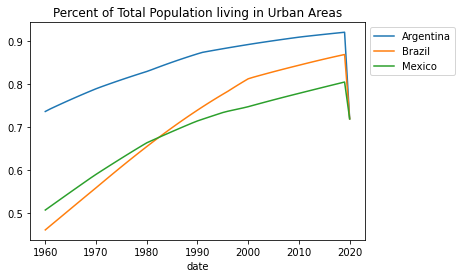

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline 

urbpopwide[["Argentina", "Brazil", "Mexico"]].plot.line(title='Percent of Total Population living in Urban Areas')
plt.legend(bbox_to_anchor = [1,1])

Solución 3.5)

In [ ]:
# 3.5
import matplotlib.pyplot as plt
# Hacemos una base del 2018
df_2018 = df[df.date =='2018']
df_2018.head()

,country,date,gdp_pc,gni_pc,inflation,educAtt_prim_25+,preval_undernour,netMig,life_exp,literacyRate,electAccess,totalpop,urbanpop,air_poll,popLgstCity,urbBelow5m,popRef,popDens,electAccessUrb,forestArea_km2,coemissions_pc,annualwaterwithdrawals_perc,annualwaterresources_pc,urbanpop_per
58,Argentina,2018,22759.398560,22480.0,53.555082,92.695374,3.8,-139706.945652,76.520,99.003868,86.226351,44494502.0,40877099.0,93.991097,36.613484,4.86776,3442.0,16.258510,95.74509,287910.0,1.91722,5.236934,56697.558008,0.918700
119,Belize,2018,7118.331931,6580.0,53.555082,70.418803,7.6,-139706.945652,74.496,90.333981,86.226351,383071.0,175155.0,93.991097,38.921124,4.86776,29.0,16.793994,95.74509,12993.7,1.91722,5.236934,56697.558008,0.457239
180,Bolivia,2018,8655.529960,8650.0,2.272060,70.418803,15.5,-139706.945652,71.239,90.333981,86.226351,11353142.0,7881919.0,93.991097,23.015804,4.86776,802.0,10.480146,95.74509,512532.4,1.91722,5.236934,56697.558008,0.694250
241,Brazil,2018,14596.246162,14530.0,3.664850,80.275124,2.5,-139706.945652,75.672,93.227501,86.226351,209469333.0,181335507.0,93.991097,11.939295,4.86776,11304.0,25.061716,95.74509,4990514.0,1.91722,5.236934,56697.558008,0.865690
302,Chile,2018,25165.178178,24420.0,2.434890,70.418803,3.5,-139706.945652,80.042,90.333981,86.226351,18729160.0,16400002.0,93.991097,40.733965,4.86776,2026.0,25.189447,95.74509,179648.7,1.91722,5.236934,56697.558008,0.875640


In [ ]:
import numpy as np

for i in df_2018.iloc[:,2:]:
    for j in df_2018.iloc[:,2:]:
        if i == j:
            plot = df_2018[i].plot.hist(bins=20, alpha=1, edgecolor='black', linewidth=1)
            plot = plt.title('Histograma de '+ i, fontsize=15)
            fig = plot.get_figure()
            fig.savefig('Hist/' + i + '.png')
            plt.close(fig)
        else:
            plot = df_2018.plot.scatter(i, j, s=60, c='r')
            plt.xlabel(i, fontsize=12) 
            plt.ylabel(j, fontsize=12)
            plt.title('Dispersion entre '+ i +' vs '+ j, fontsize=15)
            fig = plot.get_figure()
            fig.savefig('Dipersión/' + i + 'vs' + j + '.png')
            plt.close(fig)

### Sección 4: Uniendo datos

1. Haz una funcion que descargue los niveles de temperatura y precipitación dado una lista de países y crea un dataframe para guardar la información. 

Para acceder a estos datos tenemos este código que accede al csv donde el dato se encuentra.

```
import pandas as pd  

url = "http://climatedataapi.worldbank.org/climateweb/rest/v1/country/cru/tas/year/MEX.csv"

df = pd.read_csv(url)
```

Donde lo que puede variar en el URL es el tipo de indicador "tas" es temperatura y "pr" es precipitacion, y el código del país. Por ejemplo, el url anterior genera información anual de temperatura para México. Si quisiera información de precipitación para Argentina sería

```
import pandas as pd 

url = "http://climatedataapi.worldbank.org/climateweb/rest/v1/country/cru/pr/year/ARG.csv"

df = pd.read_csv(url)
```

  ¿Cómo le harías para que generará información para todos los países que definimos en la primera parte de esta tarea y luego guardar toda esa información en un sólo lugar?. Tip: probablemente es momento de usar un loop o list comprehension y tus nuevos conocimientos de crear columnas en Pandas. 

Te recomendamos hacer una función llamada descarga_temperatura y ejecutar el siguiente código para acabar con un dataframe de temperatura y uno de países

```
selcountries=['ARG','BLZ','BOL','BRA','CHL','COL','CRI','CUB','SLV','GTM','GUY','HTI','HND',
              'JAM','MEX','NIC','PAN','PRY','PER','PRI','SUR','URY','VEN']

temperatura_df = descarga_temperatura(selcountries, "tas", "temperature")
precipitacion_df = descarga_temperatura(selcountries, "pr", "precipitacion")
```
  
2. Une los datos de temperatura y precipitación con los que hemos obtenido del Banco Mundial previamente.
Piensa bien cuáles son las llaves del join. En este caso, hagamos un full join.

3. Genera una matriz de correlación. ¿Hay alguna correlacion interesante entre los indicadores actuales y los niveles de temperatura?

Tip, ese código te ayudará a hacer una matriz bonita. Todo lo que necesita es un df con las correlaciones
```
def corr_matrix(corr):
    """
    Hacer una correlacion bonita
    
    Input:
    corr = un df con correlaciones
    
    Returns una matriz de correlacion
    """
    import numpy as np
    import seaborn as sns
    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    # Draw the heatmap with the mask and correct aspect ratio
    
    return sns.heatmap(corr, mask=mask, cmap=cmap, center=0,  annot=True,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})
```

4. Haz una gráfica de serie de tiempo donde compares temperatura global promedio por año contra porcentaje de urbanización global promedio por año. ¿Algo que notes?

In [ ]:
import pandas as pd

Solución 4.1)

In [ ]:
def descarga_temperatura(selcountries, clave, tipo):
    """
    Descarga data de temperatura o precipitacion de una lista de paises.
    Inputs: 
        selcountries: Lista con la clave de los paises 
        clave: "tas" -> tempreratura, "pr" -> precipitacion 
        tipo: "temperatura" o "precipitacion"
    Returns: 
        DataFrame 
    """
    url = "http://climatedataapi.worldbank.org/climateweb/rest/v1/country/cru/"+clave+"/year/"
    # Diccionario con clave y nombre del país
    nombre_paises = {'ARG':'Argentina','BLZ':'Belize','BOL':'Bolivia','BRA':'Brazil','CHL':'Chile',
                     'COL':'Colombia','CRI':'Costa Rica','CUB':'Cuba','SLV':'El Salvador','GTM':'Guatemala','GUY':'Guyana',
                     'HTI':'Haiti','HND':'Honduras','JAM':'Jamaica','MEX':'Mexico','NIC':'Nicaragua','PAN':'Panama',
                     'PRY':'Paraguay','PER':'Peru','PRI':'Puerto Rico','SUR':'Suriname','URY':'Uruguay','VEN':'Venezuela, RB'}
    # Generación de dataframe, primera columna queda 'date', y luego la data de cada pais por columna usando list comprehesion
    data_pr_tas = pd.concat([pd.read_csv(url + pais + '.csv').rename(columns = {'year':'date', 'data':pais}).set_index('date') 
                              for pais in selcountries], axis=1).reset_index(level=0).rename(columns=nombre_paises)
    # Se retorna un melt para dar orden: quedan 3 columnas, date, country y tipo
    return (pd.melt(data_pr_tas,id_vars=['date'], var_name=['country'], value_name=tipo))


In [ ]:
selcountries=['ARG','BLZ','BOL','BRA','CHL','COL','CRI','CUB','SLV','GTM','GUY','HTI','HND',
              'JAM','MEX','NIC','PAN','PRY','PER','PRI','SUR','URY','VEN']

df_tas = descarga_temperatura(selcountries, 'tas', 'temperatura')
df_pr = descarga_temperatura(selcountries, 'pr', 'precipitacion')

In [ ]:
df_tas

,date,country,temperatura
0,1901,Argentina,14.340198
1,1902,Argentina,14.090124
2,1903,Argentina,13.878197
3,1904,Argentina,13.987001
4,1905,Argentina,13.679904
...,...,...,...
2571,2008,"Venezuela, RB",25.703619
2572,2009,"Venezuela, RB",26.040552
2573,2010,"Venezuela, RB",26.073315
2574,2011,"Venezuela, RB",25.751495


In [ ]:
df_pr.head()

,date,country,precipitacion
0,1901,Argentina,38.854744
1,1902,Argentina,40.401207
2,1903,Argentina,42.776569
3,1904,Argentina,44.372555
4,1905,Argentina,45.000557


Solución 4.2)

Primero unamos df_tas y df_pr en una sola base, y después con df (base del banco mundial)

Usaremos la funcion merge con el argumento 'outer' para lograr un FULL JOIN


In [ ]:
# Full join entre tempreatura y precipitación
df_temp_precip = pd.merge(df_tas, df_pr, on=['date', 'country'], how='outer')
# Full join entre df_temp_precip y df:
# Primero pasamos 'date' de string a números para poder hacer la unión sobre esta variable
df.date = pd.to_numeric(df.date)
df_full = pd.merge(df_temp_precip, df, on=['date', 'country'], how='outer')

Solución 4.3)

In [ ]:
def corr_matrix(corr):
    """
    Hacer una correlacion bonita
 
    Input:
    corr = un df con correlaciones
 
    Returns una matriz de correlacion
    """
    import numpy as np
    import seaborn as sns
    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    # Draw the heatmap with the mask and correct aspect ratio
 
    return sns.heatmap(corr, mask=mask, cmap=cmap, center=0,  annot=True,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})

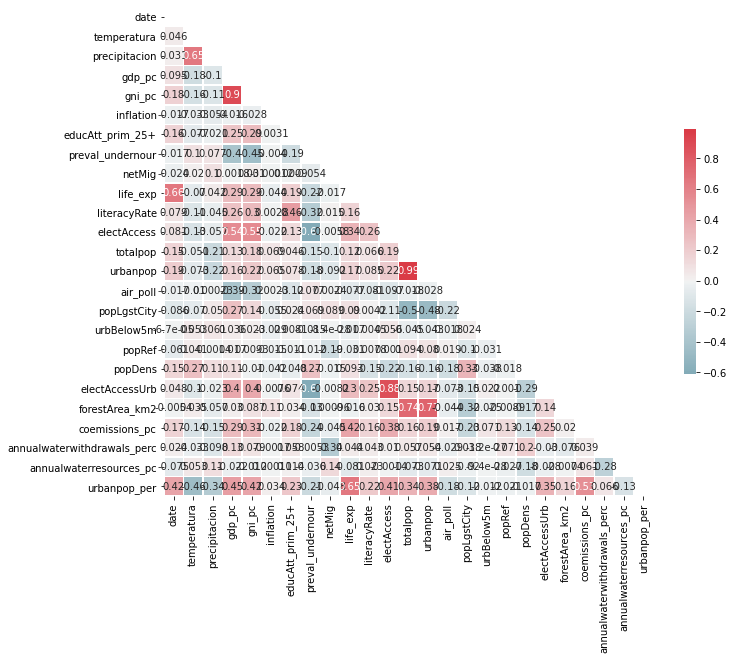

In [ ]:
corr_matrix(df_full.corr())

Note que la temperatura casi no esta correlacionada "sifnificativamente" con ningún indicador.

Con la mayoria esta correlacionada negativamente pero muy poco y con los que logra tener mayor correlación es con gdp_pc (-0.180780), gni_pc (-0.155881), pop_Dens (0.266201), urbanpop_per (-0.457826)


Solución 4.4)

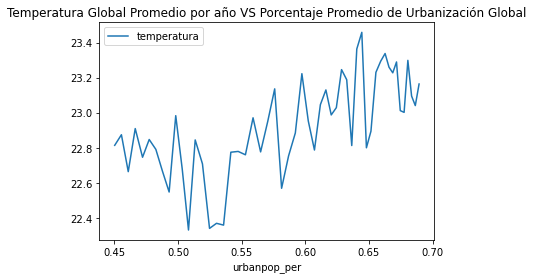

In [ ]:
df_full.groupby(by="date").mean().plot.line(x='urbanpop_per', y='temperatura')
plt.title('Temperatura Global Promedio por año VS Porcentaje Promedio de Urbanización Global')
plt.show()

Lo que podemos ver es que hay una relación creciente entre el porcentaje de urbanización global y la temperatura (deriva creciente)

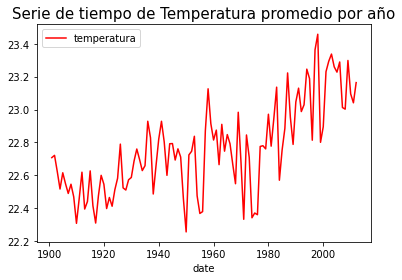

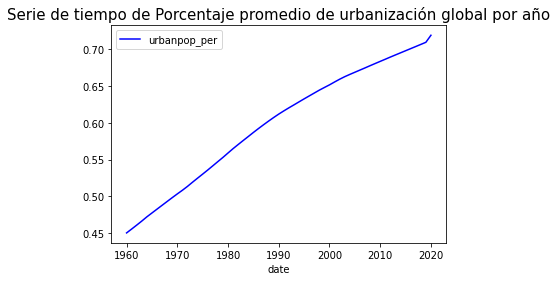

In [ ]:
df_full.groupby(by="date").mean().plot.line(y='temperatura', c='r')
plt.title('Serie de tiempo de Temperatura promedio por año', fontsize=15)
df_full.groupby(by="date").mean().plot.line(y='urbanpop_per', c='b')
plt.title('Serie de tiempo de Porcentaje promedio de urbanización global por año', fontsize=15)
plt.show()

Además, podemos ver en las series de tiempo que el promedio de porcentaje de urbanización global por año y el promedio de temperatura por año, han crecido a lo largo del tiempo
 